#### Optimization in `standard form`

$$\begin{align*}
\text{minimize}\,\,\, & f_0(x) \\
\text{subject to}\,\,\, & f_i(x)\leq 0, i=1, \cdots, m\\
& h_i(x)=0, i=1,\cdots, p
\end{align*}$$

* $x \in\mathbf{R}^n$
* $f_0: \mathbf{R}^n\rightarrow \mathbf{R}$
* $f_i: \mathbf{R}^n\rightarrow \mathbf{R}$
* $h_i: \mathbf{R}^n\rightarrow \mathbf{R}$
* $x$ is `feasible` if $x\in \text{dom}f_0$ and it satisfies constraints


Optimal value (of `objective`)

$$p^*=\inf \{f_0|f_i(x)\leq 0, h_i(x)=0\}$$

* $p^*=\infty$ if problem is `infeasible` (no $x$ satisfies constraints, not to be confused with when $x$ is infeasible)
* $p^*=-\infty$ if problem is unbounded below

A `feasible` $x$ is `optimal` if $f_0(x)=p^*$

$x$ is `locally` optimal if it is optimal for
$$\begin{align*}
\text{minimize}\,\,\, & f_0(z) \\
\text{subject to}\,\,\, & f_i(z)\leq 0, i=1, \cdots, m\\
& h_i(z)=0, i=1,\cdots, p \\
&\|z-x\|_2\leq R, R>0
\end{align*}$$
that is, you do a local search around $z=x$, and you find no other $f(z)$ that is smaller than $f(x)$

#### `Convex` optimization in standard form

$$\begin{align*}
\text{minimize}\,\,\, & f_0(x) \\
\text{subject to}\,\,\, & f_i(x)\leq 0, i=1, \cdots, m\\
& a_i^Tx=b_i, i=1,\cdots, p
\end{align*}$$

* $f_0,\cdots,f_m$ are `convex`, equality constraints are `affine` (linear + constant)
* often written as

$$\boxed{\begin{align*}
\text{minimize}\,\,\, & f_0(x) \\
\text{subject to}\,\,\, & f_i(x)\leq 0, i=1, \cdots, m\\
& Ax=b
\end{align*}}$$

`Example`

$$\begin{align*}
\text{minimize}\,\,\, & f_0(x)=x_1^2+x_2^2 \\
\text{subject to}\,\,\, & f_1(x)=x_1/(1+x_2^2)\leq 0\\
& h_1(x)=(x_1+x_2)^2=0
\end{align*}$$

Here, $f_1$ is not convex, and $h_1$ is not affine, but we can transform it to the following standard form

$$\begin{align*}
\text{minimize}\,\,\, & x_1^2+x_2^2 \\
\text{subject to}\,\,\, & x_1\leq 0\\
& x_1+x_2=0
\end{align*}$$


#### Any local optimal is `global optimal` for convex problem

Suppose $x$ is locally optimal, meaning there is an $R>0$, such that $\|z-x\|_2\leq R\rightarrow f_0(z)\geq f_0(x)$

Now if there is a $y$ with $f_0(y)<f_0(x)$, then we can draw a line segment over $x$ and $y$, and let $z=\theta y +(1-\theta) x$ with $\theta = \frac{R}{2\|y-x\|_2}$

* We can check that since $\|y-x\|_2\geq R$ by construction, then, $\theta\in (0, \frac{1}{2})$, making $z$ a `convex combination` of $x$ and $y$
* Since $x$ and $y$ are feasible, $z$ is also `feasible`
* and
$$\|z-x\|_2=\theta(y-x)=\frac{R}{2}<R$$
indicating this convex combination still constrains $z$ in the local region where $x$ is local optimal, or $f_0(z) \geq f_0(x)$

Now, with convexity of $f$, we have

$$f_o(z)=f_0\left(\theta y + (1-\theta) x\right) \leq \theta f_0(y) + (1-\theta) f_0(x)<\theta f_0(x) + (1-\theta )f_0(x)=f_0(x)$$

which `contradicts` $f_0(z)\geq f_0(x)$

Therefore, no such $y$ exists and $x$ is the global optimal point

#### Optimality `criterion` for differentiable $f_0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

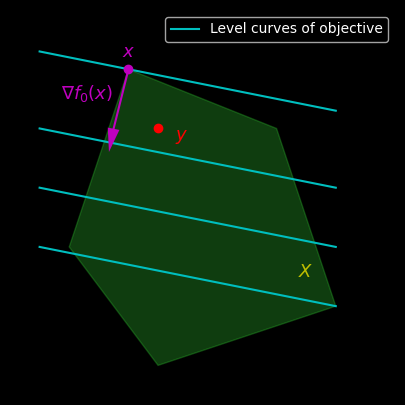

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.scatter(-1, 1, color='r', zorder=6)
plt.text(-0.6, 0.8, r'$y$', horizontalalignment='center', fontsize=13, color='r')

plt.scatter(-1.5, 2, color='m', zorder=6)
plt.text(-1.5, 2.2, r'$x$', horizontalalignment='center', fontsize=13, color='m')
plt.plot([-1.5, -1.75], [2, 1], 'm-')
ax.arrow(-1.75, 1, -0.001, -0.001/0.5*2.5,
         head_width=0.2, head_length=0.4, fc='m', ec='none', zorder=5)

plt.text(-2.2, 1.5, r'$\nabla f_0(x)$', horizontalalignment='center', fontsize=13, color='m')
polygon_points = np.array([[-1.5, 2], [-2.5, -1], [-1, -3], [2, -2], [1, 1]])
ax.fill(polygon_points[:, 0], polygon_points[:, 1], color='limegreen', alpha=0.3)
plt.plot([-3, 2], [1, 0], 'c-')
plt.plot([-3, 2], [0, -1], 'c-')
plt.plot([-3, 2], [-1, -2], 'c-')
plt.plot([-3, 2], [2.3, 1.3], 'c-', label='Level curves of objective')

plt.text(1.5, -1.5, r'$X$', horizontalalignment='center', fontsize=13, color='y')

ax.set_xlim(-3.5, 3)
ax.set_ylim(-3.5, 3)
ax.set_aspect('equal')
ax.axis('off')
plt.legend(loc='upper right')
plt.show()

$x$ is optimal `if and only if` it is feasible and

$$\nabla f_0(x)^T(y-x)\geq 0, \forall y\in X$$

That is, all feasible points on the (positive gradient) side of hyperplane satisfy this inequality

If $x$ is `interior` of $X$, then $\nabla f_0(x)=0$, the condition holds as well

This can also be seen directly from 1st optimality condition

$$f_0(y) \geq f_0(x)+\nabla ^T f_0(x) (y-x)$$

#### Common `equivalent` convex formulations

##### `No equality` constraints

$$\begin{align*}
\text{minimize (over z)}\,\,\, & f_0(Fz+x_0) \\
\text{subject to}\,\,\, & f_i(Fz+x_0)\leq 0, i=1, \cdots, m\\
\end{align*}$$

where $F$ and $x_0$ are such that

$$Ax=b \Longleftrightarrow x=Fz+x_0$$

Here, $F$ can be such that its columns span the `nullspace` of $A$ (which gives $AF=0$) and $x_0$ is a particular solution of $Ax=b$

With these, the equality constraint is satisfied for all $z$

$$Ax=AFz+Ax_0=0z+b=b$$

##### `Slack` variables for linear inequalities

If we have

$$\begin{align*}
\text{minimize}\,\,\, & f_0(x) \\
\text{subject to}\,\,\, & a_i^Tx\leq b_i, i=1,\cdots, m
\end{align*}$$

we can transform it to

$$\begin{align*}
\text{minimize}\,\,\, & f_0(x) \\
\text{subject to}\,\,\, & a_i^Tx + s_i = b_i, i=1,\cdots, m \\
& -s_i \leq 0, i=1,\cdots, m
\end{align*}$$

##### `Add equality` constraints

$$\begin{align*}
\text{minimize}\,\,\, & f_0(A_0x+b_0) \\
\text{subject to}\,\,\, & f_i(A_ix+b_i)\leq 0, i=1, \cdots, m\\
\end{align*}$$

is equivalent to

$$\begin{align*}
\text{minimize over } x, y_i\,\,\, & f_0(y_0) \\
\text{subject to}\,\,\, & f_i(y_i)\leq 0, i=1, \cdots, m\\
& y_i=A_ix+b_i , i=1, \cdots, m
\end{align*}$$

##### `Epigraph` form

Standard convex formulation is equivalent to

$$\begin{align*}
\text{minimize over } x, y \,\,\, & t \\
\text{subject to}\,\,\, & f_0(x) - t \leq 0 \\
& f_i(x)\leq 0, i=1, \cdots, m\\
& Ax=b
\end{align*}$$

which allows us to minimize a `linear objective`

#### Linear program (LP)

Convex problem with `affine` objective and constraints, feasible set is a polyhedron

$$\begin{align*}
\text{minimize}\,\,\, & c^Tx+d \\
\text{subject to}\,\,\, & Gx \leq h\\
& Ax=b
\end{align*}$$

Geometrically, the solution is always at a `vertex`

##### `Diet example`

Choose quantities $x_1,\cdots, x_n$ of $n$ foods
* one unit of food $j$ costs $c_j$, and it contains amount $a_{ij}$ of nutrient $i$
* healthy diet requires nutrient $i$ in quantity at least $b_i$
* we want to find lowest cost

$$\begin{align*}
\text{minimize}\,\,\, & c^Tx \\
\text{subject to}\,\,\, & -Ax \leq b\\
& -x \leq 0
\end{align*}$$

##### `Piecewise-linear` optimization

$$\min_x \max_{i=1, \cdots, m}(a_i^Tx+b_i)$$

This is equivalent to LP

$$\begin{align*}
\text{minimize }x, t\,\,\, & t \\
\text{subject to}\,\,\, & a_i^Tx+b_i \leq t, i=1, \cdots, m
\end{align*}$$

#### Quadratic program (QP)

Linear program with an addition quadratic term in objective

$$\begin{align*}
\text{minimize}\,\,\, & \frac{1}{2}x^TPx+q^Tx+r \\
\text{subject to}\,\,\, & Gx \leq h\\
& Ax=b
\end{align*}$$

where $P\in S^n_+$

A variation is to add quadratic constraints to get quadratically constrained quadratic program (QCQP)

$$\begin{align*}
\text{minimize}\,\,\, & \frac{1}{2}x^TPx+q^Tx+r \\
\text{subject to}\,\,\, & \frac{1}{2}x^TP_ix+q_i^Tx+r_i\leq 0, i=1, \cdots, m\\
& Ax=b
\end{align*}$$

where $P_i\in S_+^n$

#### Second-order cone program (SOCP)

$$\begin{align*}
\text{minimize}\,\,\, & f^Tx \\
\text{subject to}\,\,\, & \|A_ix+b_i\|_2\leq c_i^Tx+d_i, i=1, \cdots, m\\
& Fx=g
\end{align*}$$

where $A_i\in \mathbf{R}^{n_i \times n}$, $F\in \mathbf{R}^{p \times n}$

* if $n_i=0$, it becomes LP
* if $c_i=0$, it becomes QCQP

##### `Robust` LP example

For LP

$$\begin{align*}
\text{minimize}\,\,\, & c^Tx \\
\text{subject to}\,\,\, & a_i^Tx\leq b, i=1, \cdots, m\\
\end{align*}$$

if we were to consider uncertainty in $a_i$, then we have two common approaches

`First`, we can choose an ellipsoid $E_i$, and we insist that constaints hold for `any` $a_i$ in the ellispoid

$$E_i=\{\bar{a}_i+P_iu|\|u\|_2\leq 1\}$$

and we can convert LP to SOCP

$$\begin{align*}
\text{minimize}\,\,\, & c^Tx \\
\text{subject to}\,\,\, & \bar{a}_i^Tx + \|P_i^Tx\|_2\leq b_i, i=1, \cdots, m\\
\end{align*}$$

which follows from (via Cauchy-Schwarz)

$$(\bar{a}_i+P_iu)^Tx =\bar{a}_i^Tx+u^TP_ix \leq \bar{a}_i^Tx+\|u\|_2\|P_i^Tx\|_2=\bar{a}_i^Tx+\|P_i^Tx\|_2$$

`Second`, we want the constaints to hold with `probability` $\eta$, and we assume $a_i \sim N(\bar{a}_i, \Sigma_i)$

Therefore, $a_i^Tx \sim N(\bar{a}_i^Tx, x^T\Sigma_ix)$

Then, we can compute the probability with which the constraint holds (where $a_i^Tx$ is the random variable and $b_i$ is the threshold)

$$p(a_i^Tx\leq b_i)=\Phi \left(\frac{b_i-\bar{a}_i^Tx}{\|\Sigma_i^{\frac{1}{2}}x\|_2}\right)\geq \eta$$

where $\Phi(x)$ is the CDF of standard Gaussian distribution

With $\eta \geq \frac{1}{2}$ (which makes $\Phi^{-1}$ non-negative. Also in practice, we probabilty prefer higher threshold for constraint satisfaction than just $\frac{1}{2}$), we can convert the problem to SOCP

$$\begin{align*}
\text{minimize}\,\,\, & c^Tx \\
\text{subject to}\,\,\, & \bar{a}_i^Tx + \Phi^{-1}(\eta)\|\Sigma_i^{\frac{1}{2}}x\|_2\leq b_i, i=1, \cdots, m\\
\end{align*}$$

#### Semidefinite program (SDP)

It is LP with inequality constraints replaced by linear matrix inequality (LMI)

$$\begin{align*}
\text{minimize}\,\,\, & c^Tx \\
\text{subject to}\,\,\, & x_1F_1 + \cdots + x_nF_n+G\leq 0\\
& Ax=b
\end{align*}$$

with $F_i, G\in S^k$

If we have multiple LMI constraints, we can chunk them together

$$x_1\begin{bmatrix}\hat{F}_1 & 0 \\ 0 & \bar{F}_1 \end{bmatrix}+\cdots + x_n\begin{bmatrix}\hat{F}_n & 0 \\ 0 & \bar{F}_n \end{bmatrix}+G \leq 0$$

##### LP expressed as SDP

LP

$$\begin{align*}
\text{minimize}\,\,\, & c^Tx \\
\text{subject to}\,\,\, & Ax\leq b
\end{align*}$$

SDP

$$\begin{align*}
\text{minimize}\,\,\, & c^Tx \\
\text{subject to}\,\,\, & \text{diag}(Ax-b)\leq 0
\end{align*}
$$

##### SOCP expressed as SDP

SOCP

$$\begin{align*}
\text{minimize}\,\,\, & f^Tx \\
\text{subject to}\,\,\, & \|A_ix+b_i\|_2\leq c_i^Tx+d_i, i=1, \cdots, m\\
\end{align*}$$

SDP


$$\begin{align*}
\text{minimize}\,\,\, & f^Tx \\
\text{subject to}\,\,\, & \begin{bmatrix}(c_i^Tx+d_i)I & A_ix+b_i \\ (A_ix+b_i)^T & c_i^Tx+d_i\end{bmatrix}\geq 0, i=1, \cdots, m\\
\end{align*}$$

The constraints follows from property of `Schur complement`

For $X=\begin{bmatrix}A & B \\ B^T & C\end{bmatrix}$, if $A$ is PSD, then

$$X\geq 0 \Longleftrightarrow C-B^TA^{-1}B\geq 0$$

Apply to the constraint of SDP and we can recover the constraint in SOCP

##### `Eigenvalue minimization` example

$$\min \lambda_{max}(A(x))$$

where $A(x)=A_0+x_1A_1+\cdots + x_nA_n, A_i\in S^k$

is equivalent to SDP

$$\begin{align*}
\text{minimize}\,\,\, & t \\
\text{subject to}\,\,\, & A(x)-tI\leq 0\\
\end{align*}$$

where $t\in \mathbf{R}$

This follows from

$$\lambda_{max}(A)\leq t \Longleftrightarrow A\leq tI$$

##### `Matrix norm minimization` example

$$\min \|A(x)\|=\left(\lambda_{max}\left(A(x)^TA(x)\right)\right)^{\frac{1}{2}}$$

is equivalent to SDP

$$\begin{align*}
\text{minimize}\,\,\, & t \\
\text{subject to}\,\,\, & \begin{bmatrix}tI & A(x) \\ A(x)^T & tI\end{bmatrix}\geq 0\\
\end{align*}$$

This follows from

$$\begin{align*}\|A\|\leq t & \Longleftrightarrow A^TA\leq t^2I \\
& \Longleftrightarrow t^2I-A^TA \geq 0 \\
& \text{Schur complement when } tI\geq 0 \\
& \Longleftrightarrow \begin{bmatrix}tI & A \\ A^T & tI\end{bmatrix}\geq 0
\end{align*}$$